# Analysis of LL Pipeline Differential Against Ground Truth
Let's first load the data.

In [5]:
import pandas as pd
from LLRunner.BMAassumptions import (
    cellnames,
    BMA_final_classes,
    removed_classes,
    omitted_classes,
)

data_path = "/Users/neo/Documents/DATA/aml_pooled_results.csv"

df = pd.read_csv(data_path)

# print how many rows in the data
print("Number of rows in the data: ", df.shape[0])

# count remove all the rows where blast-equivalents column it non-empty
df = df[df["blast-equivalents"].isna()]
print(
    "Number of rows in the data after removing non-empty blast-equivalents: ",
    df.shape[0],
)

Number of rows in the data:  310
Number of rows in the data after removing non-empty blast-equivalents:  297


## Overall Diagnostics
Let's print some dataset overall numbers to get a feel for the results.

Total count average: 2032.976430976431
B1 average: 0.13387549546316527
B1 std: 0.09733556858530912
B1 median: 0.0998003992015967
B1 stacked average: 0.24278413774892527
B1 stacked std: 0.08786286957546371
B1 stacked median: 0.225830902288961
B2 average: 0.2978980999296616
B2 std: 0.25074144411661575
B2 median: 0.2303205428418565
B2 stacked average: 0.4434406793932552
B2 stacked std: 0.21692237015167118
B2 stacked median: 0.4044970691575421
E1 average: 0.6583564382427083
E1 std: 1.0393470102760773
E1 median: 0.2976190476190476
E1 stacked average: 0.8688201192361887
E1 stacked std: 0.8829974004725794
E1 stacked median: 0.5767695301300342
E1 count average: 14.291814946619217
E1 count std: 23.283353278866215
E1 count median: 6.0
E4 average: 0.3066768544859902
E4 std: 0.4036072582005894
E4 median: 0.176492759311348
E4 stacked average: 0.367709613211467
E4 stacked std: 0.3408831064812259
E4 stacked median: 0.2756445517464908
E4 count average: 7.14176245210728
E4 count std: 10.740604980323685

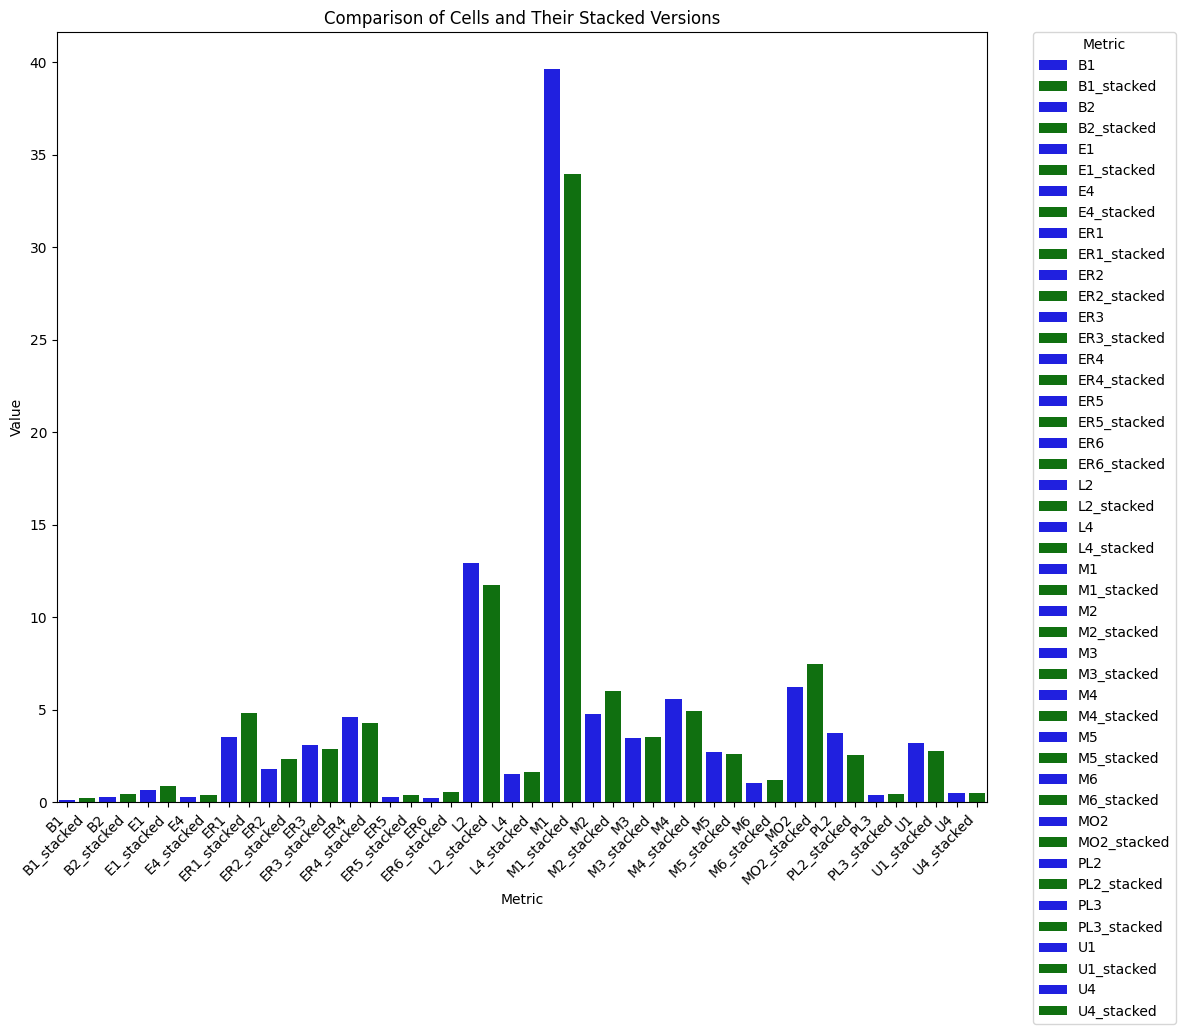

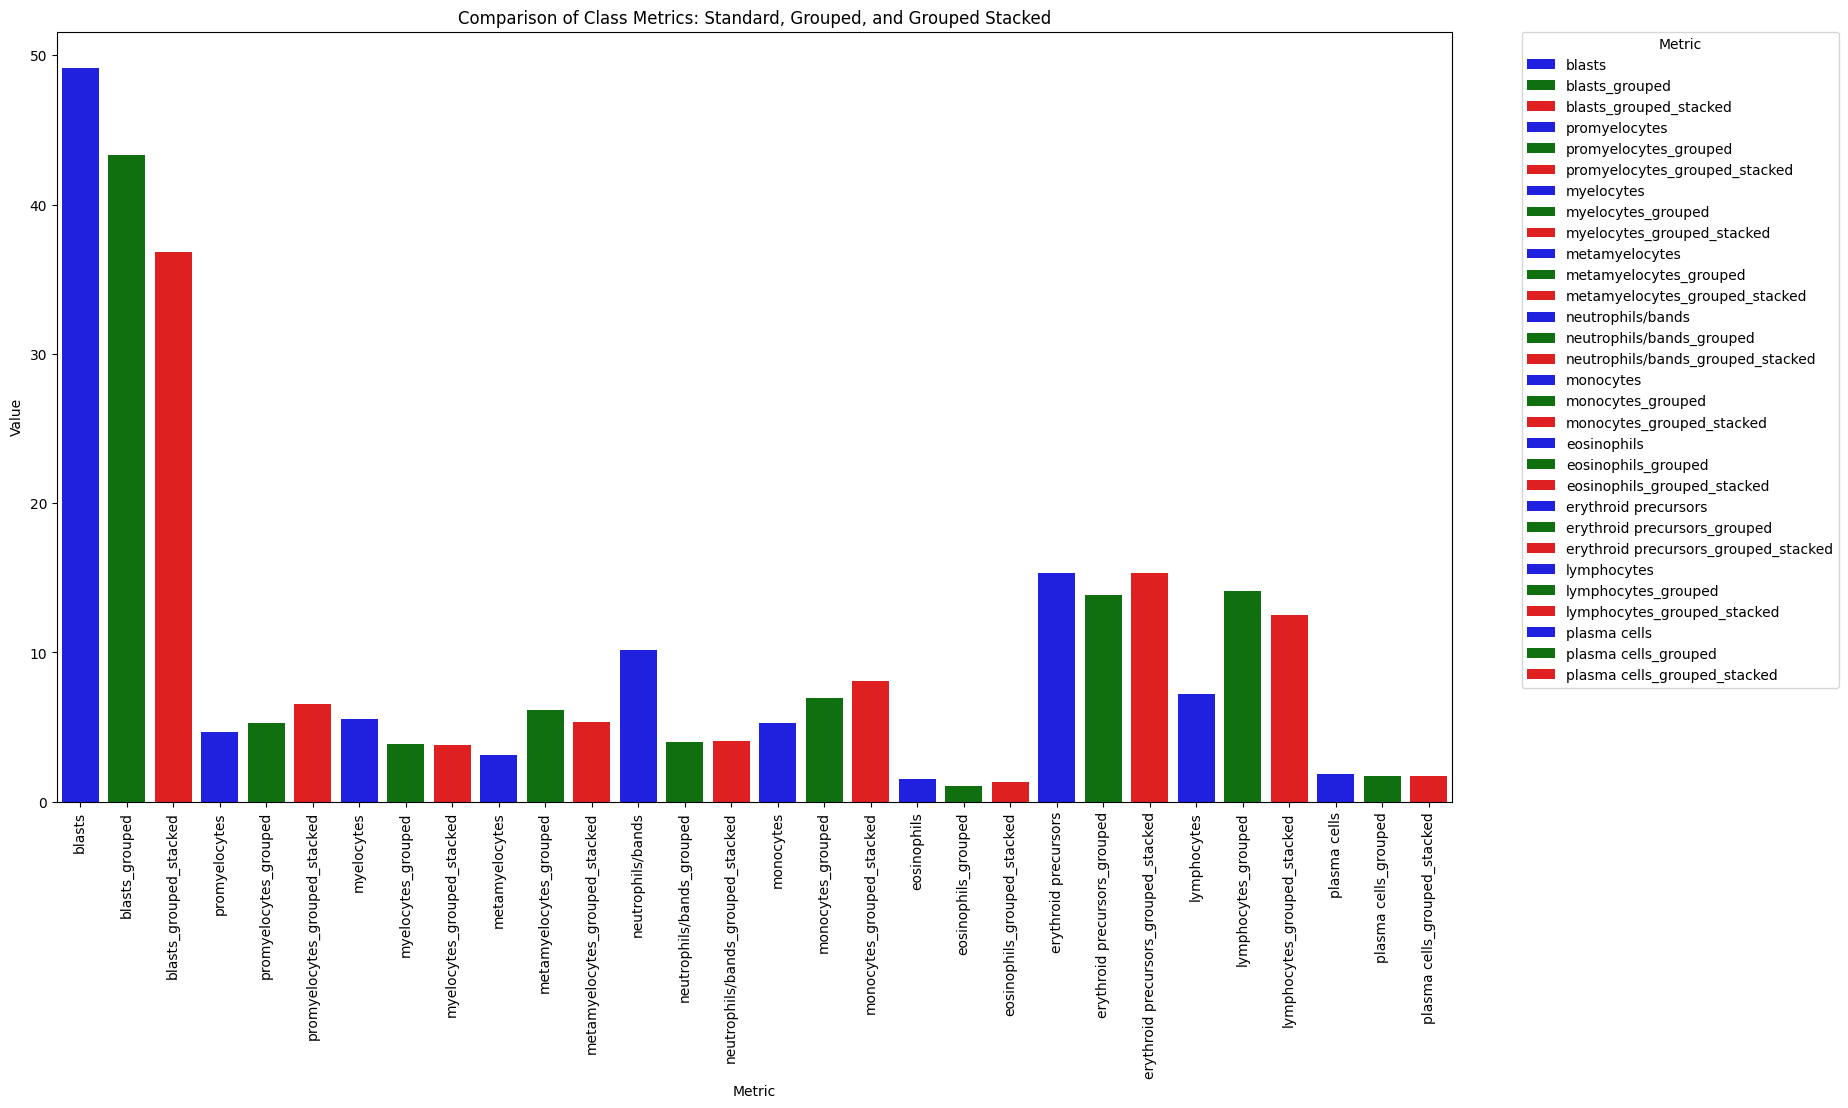

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df, cellnames, and BMA_final_classes are already defined

# new_cellnames is cellnames removing ["B1", "B2", "ER5", "ER6", "PL2", "PL3", "U1", "U4"]
new_cellnames = [cellname for cellname in cellnames if cellname not in ["B1", "B2", "ER5", "ER6", "PL2", "PL3", "U1", "U4"]]

# sum all the cellname_count columns for each row where cellname in cellnames
df['total_count'] = df[[cellname + '_count' for cellname in new_cellnames]].sum(axis=1)

# print the average of the total_count column
print(f"Total count average: {df['total_count'].mean()}")

# for each cellname in the cellnames list, get the average across all rows for that cellname and print it
for cellname in cellnames:
    print(f"{cellname} average: {df[cellname].mean()}")
    print(f"{cellname} std: {df[cellname].std()}")
    print(f"{cellname} median: {df[cellname].median()}")

    print(f"{cellname} stacked average: {df[cellname + '_stacked'].mean()}")
    print(f"{cellname} stacked std: {df[cellname + '_stacked'].std()}")
    print(f"{cellname} stacked median: {df[cellname + '_stacked'].median()}")

    if cellname in ["B1", "B2", "ER5", "ER6", "PL2", "PL3", "U1", "U4"]:
        continue

    print(f"{cellname} count average: {df[cellname + '_count'].mean()}")
    print(f"{cellname} count std: {df[cellname + '_count'].std()}")
    print(f"{cellname} count median: {df[cellname + '_count'].median()}")

# for each class in the BMA_final_classes list, get the average across all rows for that class and print it
for class_ in BMA_final_classes:
    if class_ == "blast-equivalents":
        continue

    print(f"{class_} average: {df[(class_ + '_grouped')].mean()}")
    print(f"{class_} std: {df[(class_ + '_grouped')].std()}")
    print(f"{class_} median: {df[(class_ + '_grouped')].median()}")

    print(f"{class_} ground truth average: {df[class_].mean()}")
    print(f"{class_} ground truth std: {df[class_].std()}")
    print(f"{class_} ground truth median: {df[class_].median()}")

    print(f"{class_} count average: {df[(class_ + '_grouped_count')].mean()}")
    print(f"{class_} count std: {df[(class_ + '_grouped_count')].std()}")
    print(f"{class_} count median: {df[(class_ + '_grouped_count')].median()}")


############# Cell Classes Plot ####################


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' and lists 'cellnames' and 'BMA_final_classes'
if "blast-equivalents" in BMA_final_classes:
    BMA_final_classes.remove("blast-equivalents")

# Calculate averages for cells and their stacked versions
cell_averages = pd.DataFrame([{cellname: df[cellname].mean() for cellname in cellnames}])
cell_stacked_averages = pd.DataFrame([{cellname + '_stacked': df[cellname + '_stacked'].mean() for cellname in cellnames}])

# Convert DataFrames to long format for plotting
cell_data = pd.concat([cell_averages, cell_stacked_averages], axis=1).reset_index(drop=True).melt(var_name='Metric', value_name='Value')

# Order metrics to ensure each X is next to X_stacked
order = [item for sublist in zip(cell_averages.columns, cell_stacked_averages.columns) for item in sublist]
cell_data['Metric'] = pd.Categorical(cell_data['Metric'], order)
cell_data.sort_values('Metric', inplace=True)

# Create a color palette that helps to differentiate between X and X_stacked
palette = {metric: 'blue' if '_stacked' not in metric else 'green' for metric in cell_data['Metric'].unique()}

# Plotting the data
plt.figure(figsize=(12, 10))
sns.barplot(data=cell_data, x='Metric', y='Value', hue='Metric', palette=palette, dodge=False)
plt.title('Comparison of Cells and Their Stacked Versions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()





############# Grouped classes Plot ####################

# Assuming you have a DataFrame 'df' and lists 'cellnames' and 'BMA_final_classes'
if "blast-equivalents" in BMA_final_classes:
    BMA_final_classes.remove("blast-equivalents")

# Calculate averages for class, class grouped, and class grouped stacked
class_averages = pd.DataFrame([{class_name: df[class_name].mean() for class_name in BMA_final_classes}])
class_grouped_averages = pd.DataFrame([{class_name + '_grouped': df[class_name + '_grouped'].mean() for class_name in BMA_final_classes}])
class_grouped_stacked_averages = pd.DataFrame([{class_name + '_grouped_stacked': df[class_name + '_grouped_stacked'].mean() for class_name in BMA_final_classes}])

# Convert DataFrames to long format for plotting
class_data = pd.concat([class_averages, class_grouped_averages, class_grouped_stacked_averages], axis=1).reset_index(drop=True).melt(var_name='Metric', value_name='Value')

# Order metrics to ensure X, X_grouped, and X_grouped_stacked are grouped correctly
order = [item for sublist in zip(class_averages.columns, class_grouped_averages.columns, class_grouped_stacked_averages.columns) for item in sublist]
class_data['Metric'] = pd.Categorical(class_data['Metric'], order)
class_data.sort_values('Metric', inplace=True)

# Create a color palette that helps to differentiate between X, X_grouped, and X_grouped_stacked
palette = {metric: 'blue' if '_grouped' not in metric and '_stacked' not in metric else ('green' if '_grouped' in metric and '_stacked' not in metric else 'red') for metric in class_data['Metric'].unique()}

# Plotting the data
plt.figure(figsize=(18, 10))  # Adjust figure size as necessary
sns.barplot(data=class_data, x='Metric', y='Value', hue='Metric', palette=palette, dodge=False)
plt.title('Comparison of Class Metrics: Standard, Grouped, and Grouped Stacked')
plt.xticks(rotation=90)  # Adjust rotation if necessary
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

## Dot & Identity Line Plots
Plotting a 2D dot plot for any two columns and the identity line y=x.

Number of rows removed:  0
Total number of rows:  297


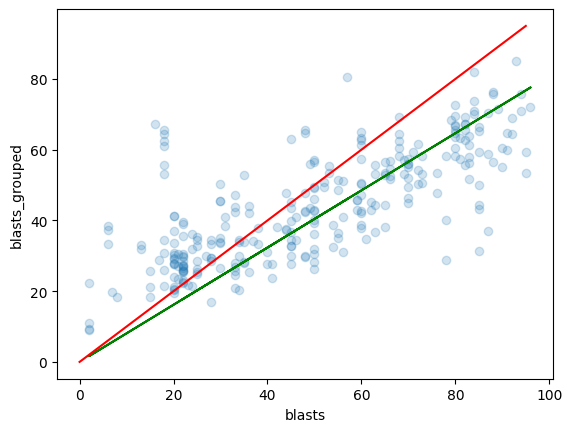

863.1245791245791
Number of rows removed:  0
Total number of rows:  297


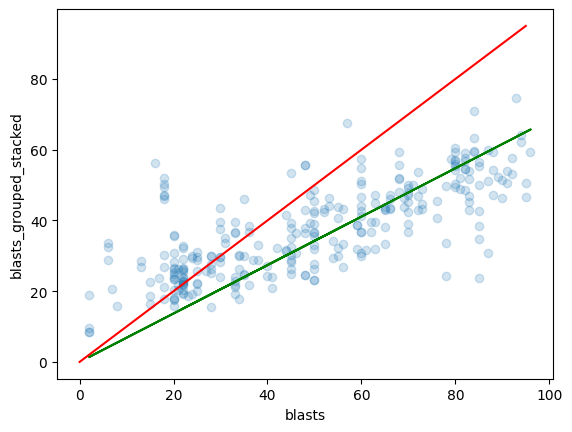

863.1245791245791
Number of rows removed:  0
Total number of rows:  297


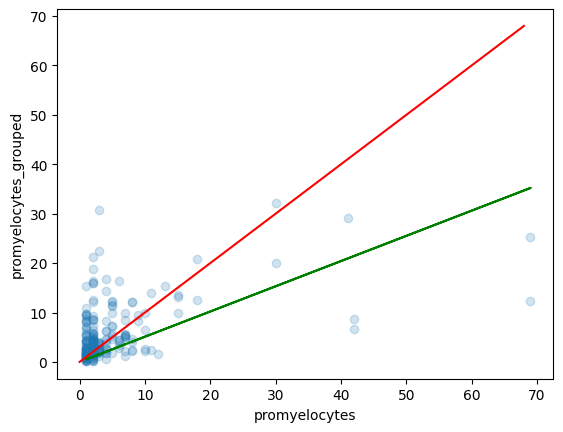

107.82491582491582
Number of rows removed:  0
Total number of rows:  297


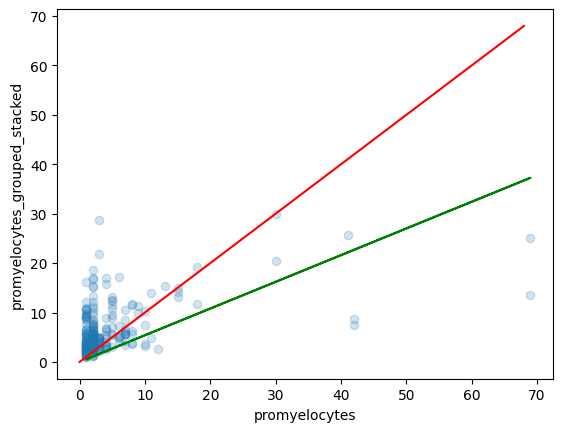

107.82491582491582
Number of rows removed:  0
Total number of rows:  297


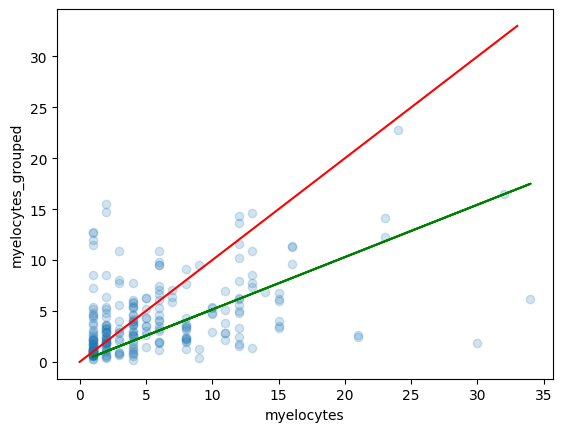

80.01346801346801
Number of rows removed:  0
Total number of rows:  297


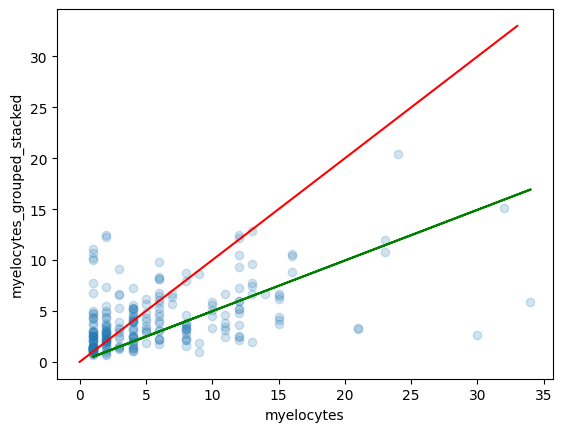

80.01346801346801
Number of rows removed:  0
Total number of rows:  297


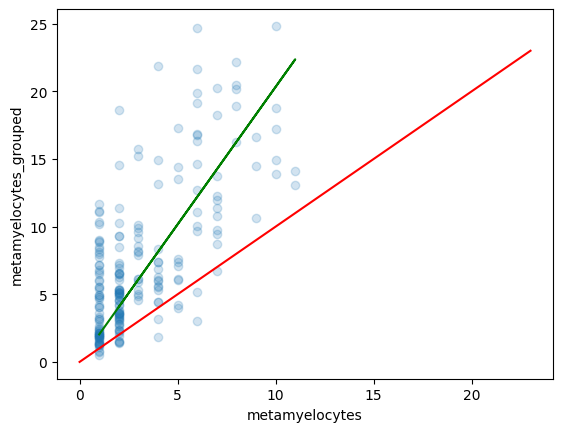

127.43050847457627
Number of rows removed:  0
Total number of rows:  297


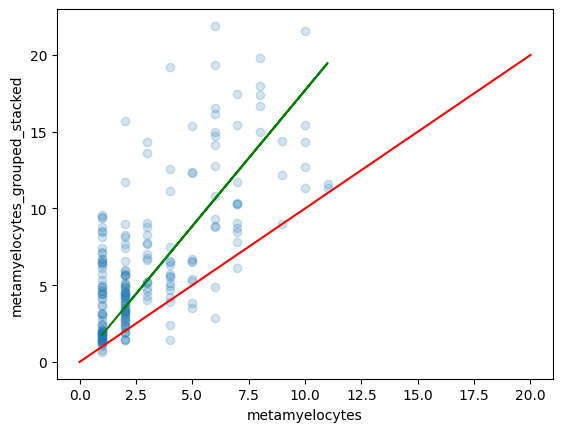

127.43050847457627
Number of rows removed:  0
Total number of rows:  297


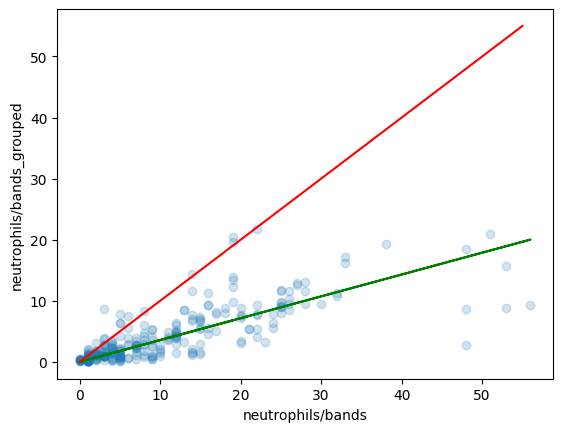

83.96232876712328
Number of rows removed:  0
Total number of rows:  297


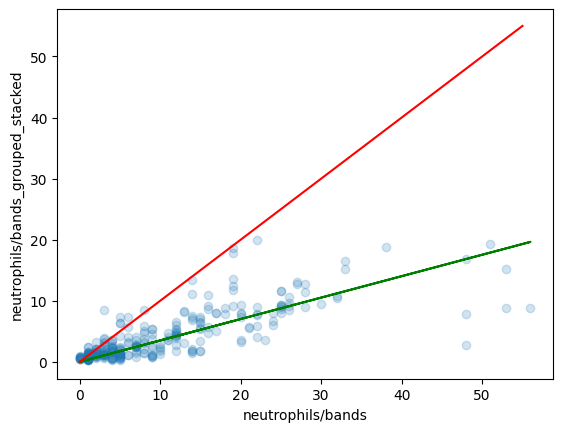

83.96232876712328
Number of rows removed:  0
Total number of rows:  297


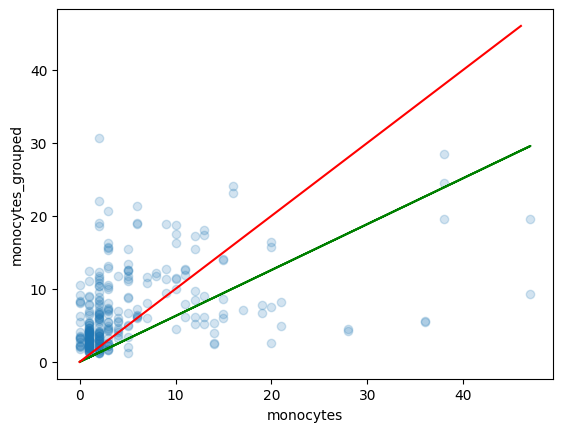

140.15488215488216
Number of rows removed:  0
Total number of rows:  297


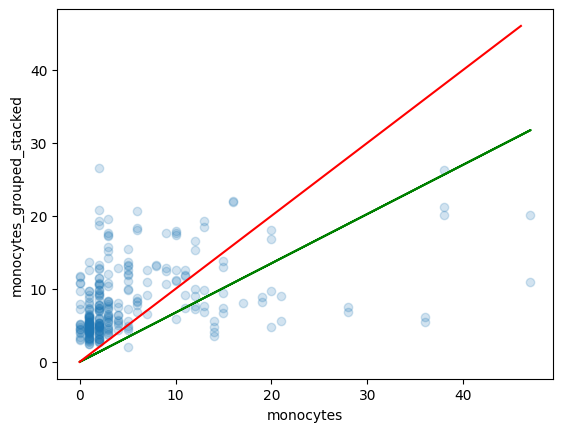

140.15488215488216
Number of rows removed:  0
Total number of rows:  297


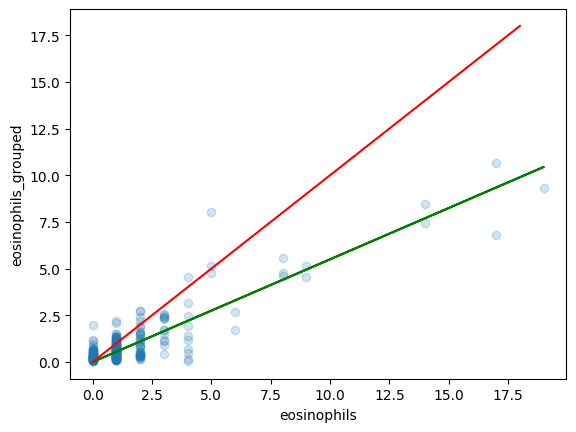

20.346020761245676
Number of rows removed:  0
Total number of rows:  297


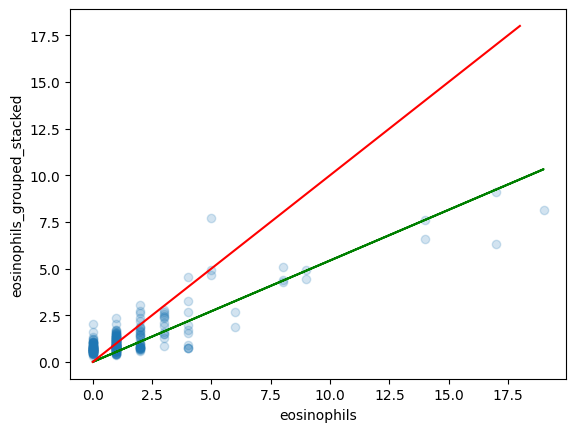

20.346020761245676
Number of rows removed:  0
Total number of rows:  297


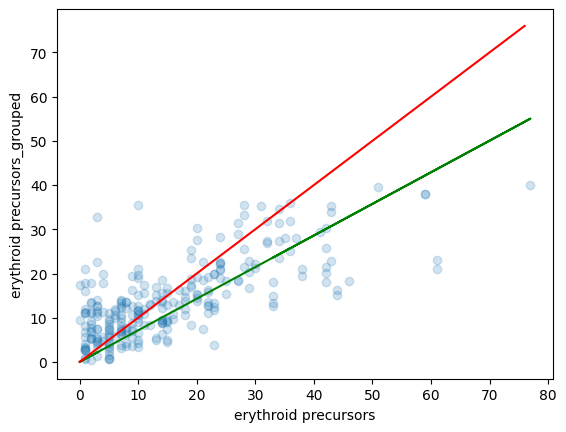

288.84511784511784
Number of rows removed:  0
Total number of rows:  297


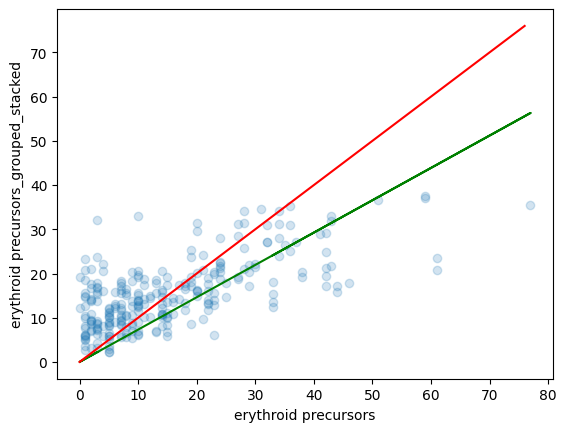

288.84511784511784
Number of rows removed:  0
Total number of rows:  297


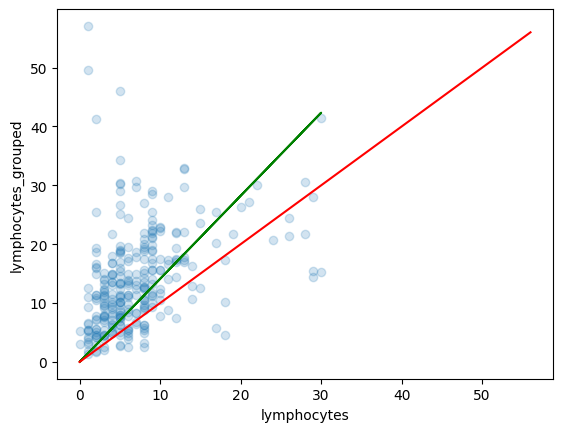

289.4141414141414
Number of rows removed:  0
Total number of rows:  297


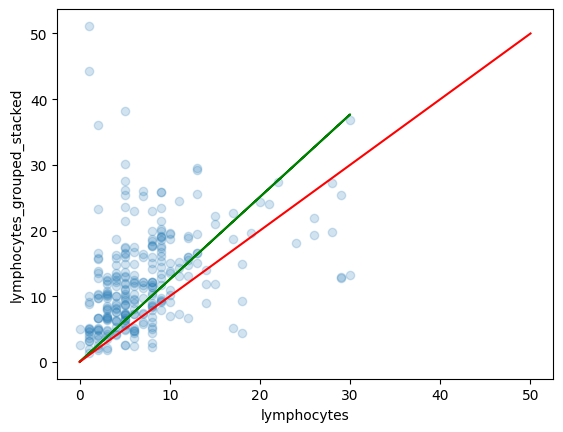

289.4141414141414
Number of rows removed:  0
Total number of rows:  297


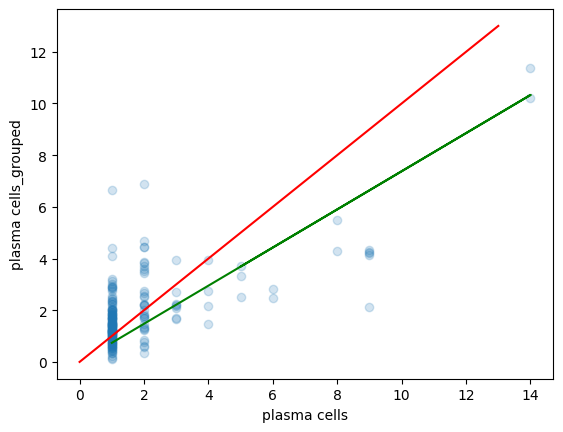

35.034013605442176
Number of rows removed:  0
Total number of rows:  297


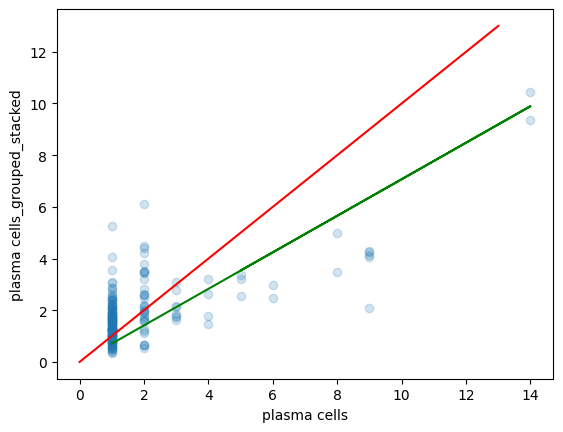

35.034013605442176


In [12]:
from sklearn.linear_model import LinearRegression

def dot_and_identity_line(column_1, column_2, intercept=False):
    """Plot a scatter plot of two columns in df with a line of y=x."""
    import matplotlib.pyplot as plt

    plt.scatter(df[column_1], df[column_2], alpha=0.2)

    # first create new_df with only the two columns and drop any rows with NaN values and print the number of rows removed
    new_df = df[[column_1, column_2]]

    # print the number of rows removed and total number of rows
    print("Number of rows removed: ", len(df) - len(new_df))
    print("Total number of rows: ", len(df))

    # drop any rows with NaN values
    new_df = new_df.dropna()

    X = new_df[[column_1]]
    y = new_df[column_2]

    model = LinearRegression(fit_intercept=intercept)
    model.fit(X, y)

    plt.plot(new_df[column_1], model.predict(X), color="green")
    
    # Add a line for the function f(x) = x by creating two lists of points that are identical
    x = list(range(int(max(df[column_1].max(), df[column_2].max()))))
    plt.plot(x, x, color='red')

    plt.xlabel(column_1)
    plt.ylabel(column_2)
    plt.show()


for celltype in BMA_final_classes:
    dot_and_identity_line(f"{celltype}_grouped", celltype)
    # print the average of blasts_grouped_count
    print(df[f"{celltype}_grouped_count"].mean())

    dot_and_identity_line(f"{celltype}_grouped_stacked", celltype)
    # print the average of blasts_grouped_count
    print(df[f"{celltype}_grouped_count"].mean())

## Dot and LR Plot
Make a dot plot and run a linear regression line through the dot plot.

Number of rows removed:  0
Total number of rows:  297


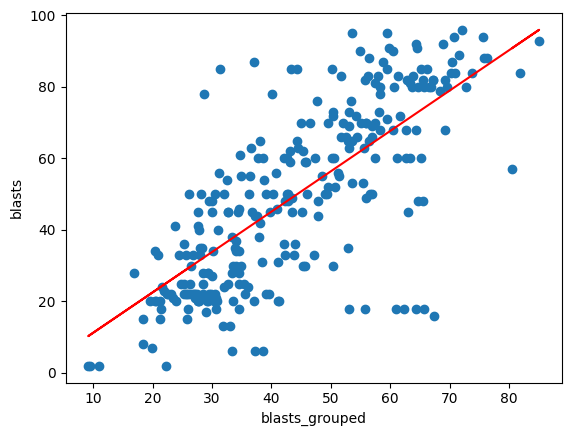

Slope:  1.128056237302851
Intercept: Turned off
863.1245791245791
Number of rows removed:  0
Total number of rows:  297


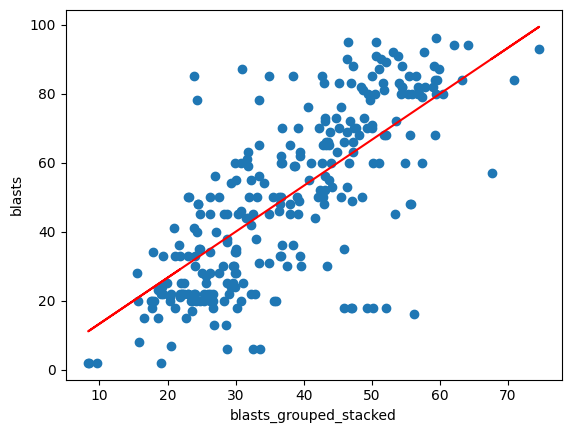

Slope:  1.3314195392221337
Intercept: Turned off
863.1245791245791
Number of rows removed:  0
Total number of rows:  297


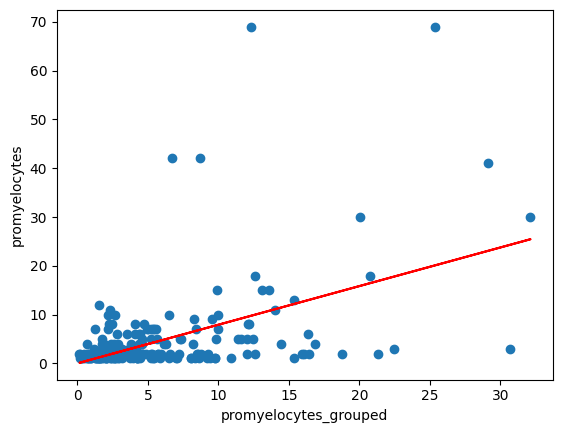

Slope:  0.7917138101287314
Intercept: Turned off
107.82491582491582
Number of rows removed:  0
Total number of rows:  297


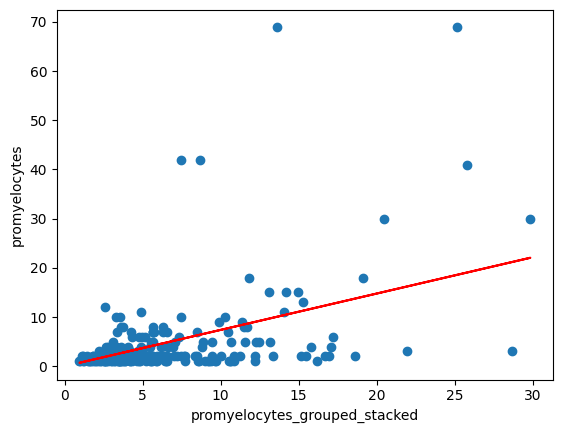

Slope:  0.7389134924256769
Intercept: Turned off
107.82491582491582
Number of rows removed:  0
Total number of rows:  297


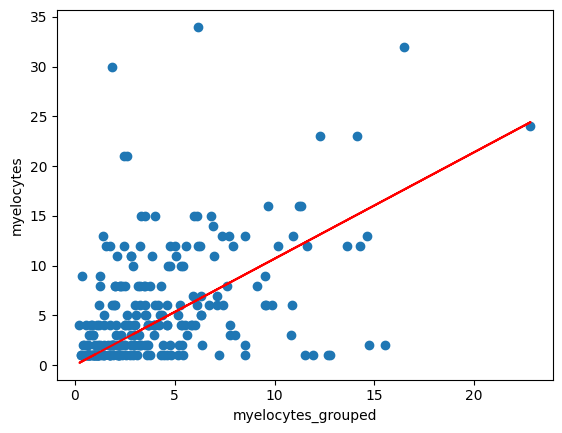

Slope:  1.069937276232559
Intercept: Turned off
80.01346801346801
Number of rows removed:  0
Total number of rows:  297


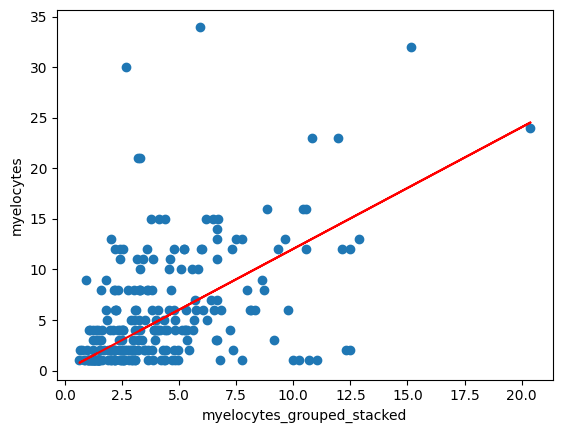

Slope:  1.2037074856598968
Intercept: Turned off
80.01346801346801
Number of rows removed:  0
Total number of rows:  297


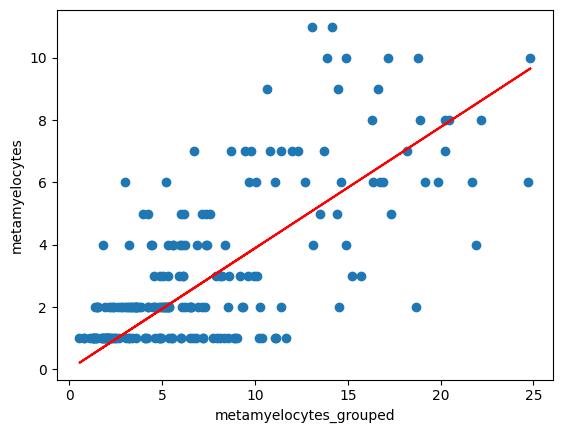

Slope:  0.3889884343664574
Intercept: Turned off
127.43050847457627
Number of rows removed:  0
Total number of rows:  297


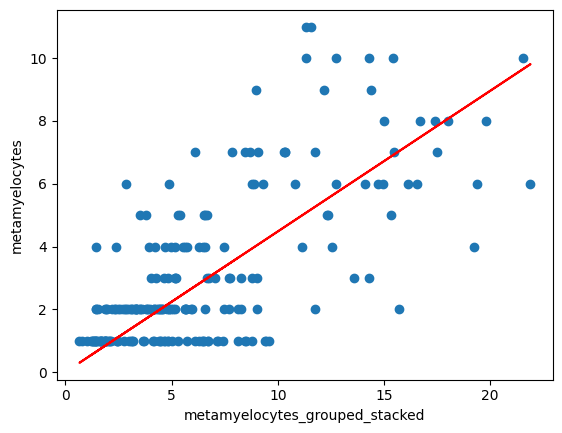

Slope:  0.4479139255350461
Intercept: Turned off
127.43050847457627
Number of rows removed:  0
Total number of rows:  297


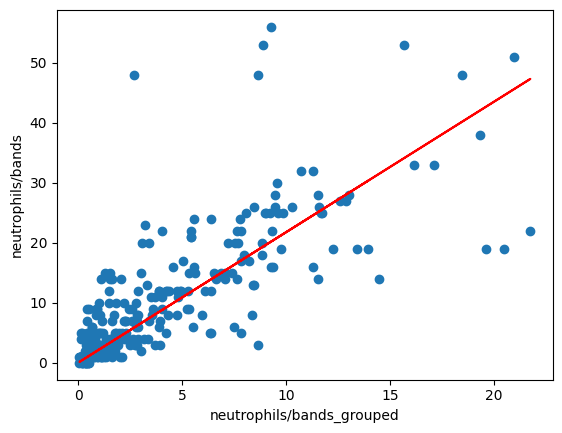

Slope:  2.1750278661742746
Intercept: Turned off
83.96232876712328
Number of rows removed:  0
Total number of rows:  297


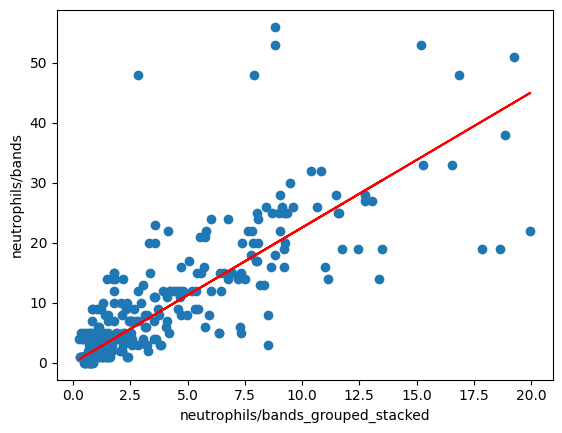

Slope:  2.2531735462164315
Intercept: Turned off
83.96232876712328
Number of rows removed:  0
Total number of rows:  297


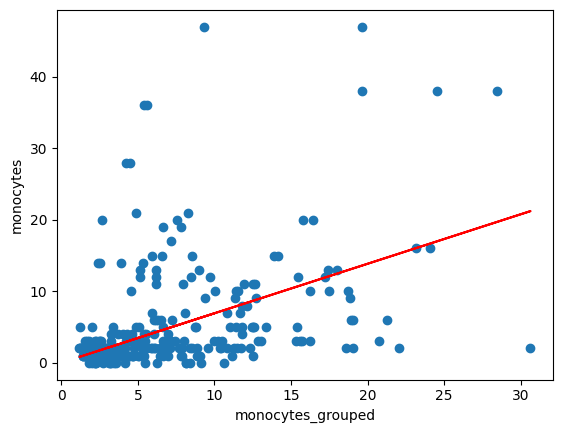

Slope:  0.6924491334185495
Intercept: Turned off
140.15488215488216
Number of rows removed:  0
Total number of rows:  297


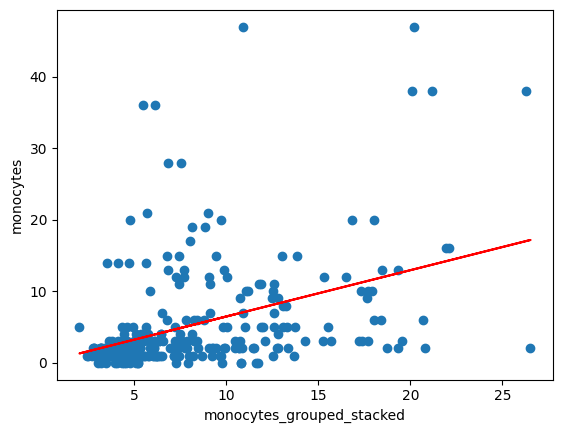

Slope:  0.6477308282674403
Intercept: Turned off
140.15488215488216
Number of rows removed:  0
Total number of rows:  297


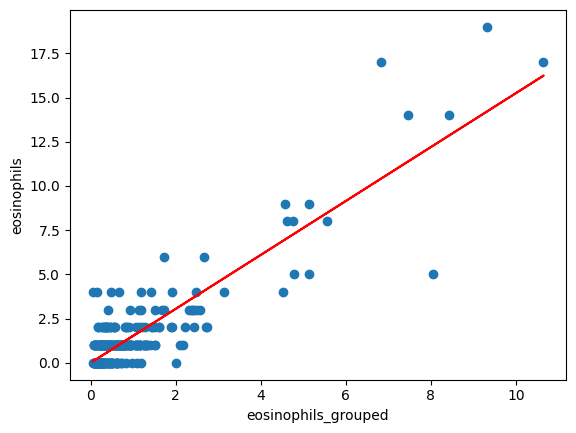

Slope:  1.5242364625295468
Intercept: Turned off
20.346020761245676
Number of rows removed:  0
Total number of rows:  297


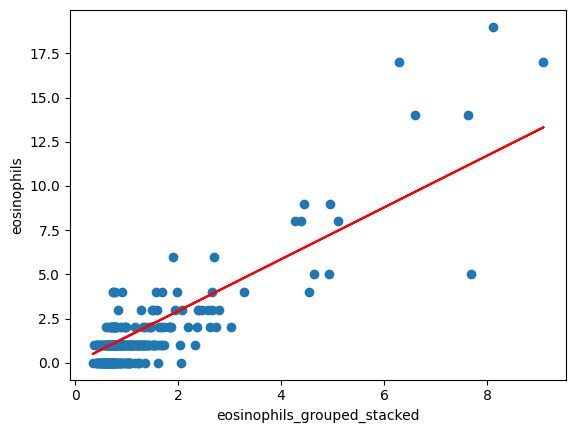

Slope:  1.463805464297021
Intercept: Turned off
20.346020761245676
Number of rows removed:  0
Total number of rows:  297


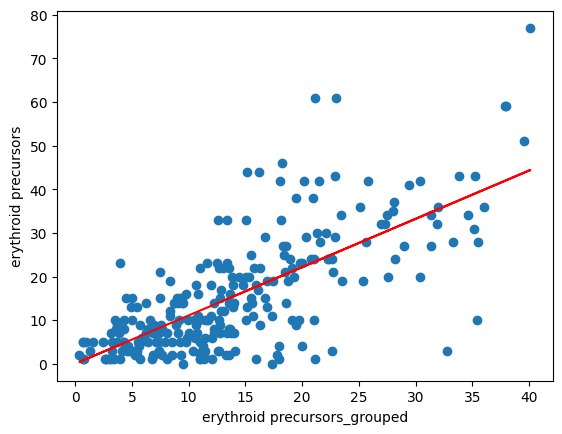

Slope:  1.1074993835266138
Intercept: Turned off
288.84511784511784
Number of rows removed:  0
Total number of rows:  297


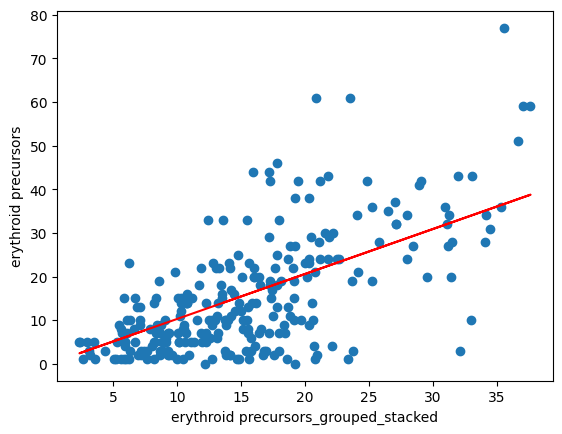

Slope:  1.029882523532743
Intercept: Turned off
288.84511784511784
Number of rows removed:  0
Total number of rows:  297


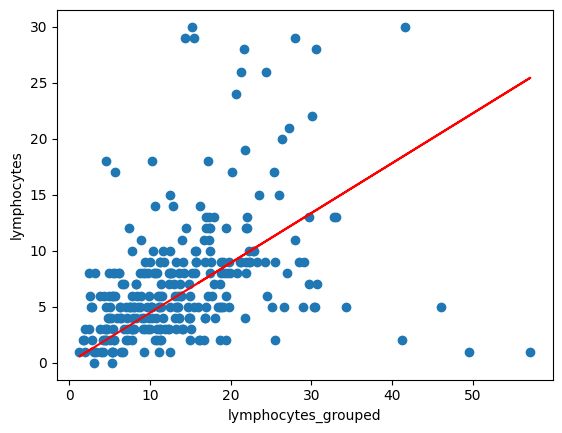

Slope:  0.44583901947127585
Intercept: Turned off
289.4141414141414
Number of rows removed:  0
Total number of rows:  297


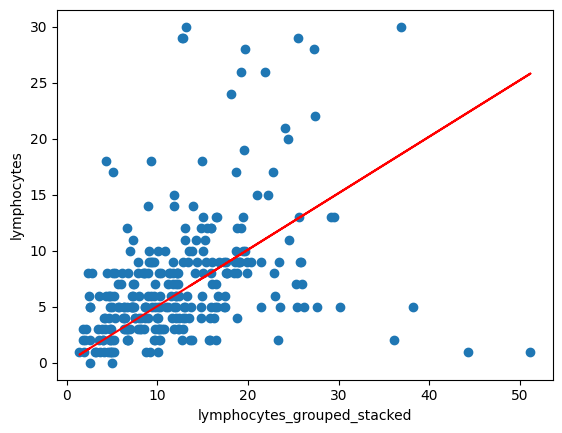

Slope:  0.504728980992187
Intercept: Turned off
289.4141414141414
Number of rows removed:  0
Total number of rows:  297


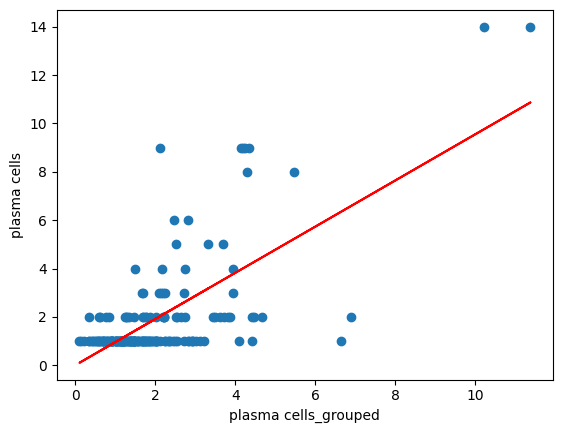

Slope:  0.9551488665159719
Intercept: Turned off
35.034013605442176
Number of rows removed:  0
Total number of rows:  297


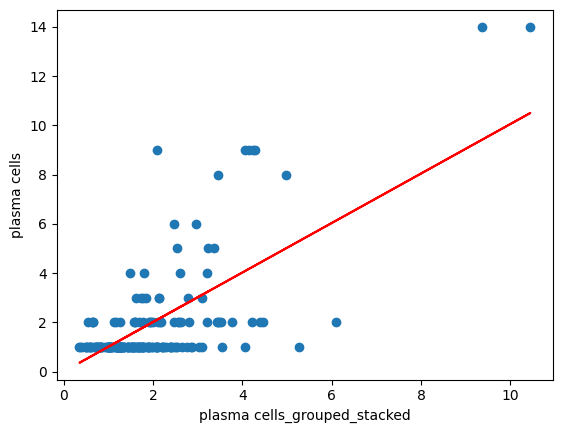

Slope:  1.0052250312028272
Intercept: Turned off
35.034013605442176


In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


def dot_and_linear_regression(column_1, column_2, intercept=False):
    """Plot a scatter plot of two columns in df with a linear regression line.
    Convention, column_1 will always be multiplied by 100.
    If intercept is True, the line will have an intercept. Else, the line must pass through the origin.
    """

    # first create new_df with only the two columns and drop any rows with NaN values and print the number of rows removed
    new_df = df[[column_1, column_2]]

    # print the number of rows removed and total number of rows
    print("Number of rows removed: ", len(df) - len(new_df))
    print("Total number of rows: ", len(df))

    # drop any rows with NaN values
    new_df = new_df.dropna()

    X = new_df[[column_1]]
    y = new_df[column_2]

    model = LinearRegression(fit_intercept=intercept)
    model.fit(X, y)

    plt.scatter(new_df[column_1], new_df[column_2])
    plt.plot(new_df[column_1], model.predict(X), color="red")
    plt.xlabel(column_1)
    plt.ylabel(column_2)
    plt.show()

    # print the slope and intercept of the line
    print("Slope: ", model.coef_[0])
    if intercept:
        print("Intercept: ", model.intercept_)
    else:
        print("Intercept: Turned off")

for celltype in BMA_final_classes:
    dot_and_linear_regression(f"{celltype}_grouped", celltype, intercept=False)
    # Also print the average grouped count
    print(df[f"{celltype}_grouped_count"].mean())

    dot_and_linear_regression(f"{celltype}_grouped_stacked", celltype, intercept=False)
    # Also print the average grouped count
    print(df[f"{celltype}_grouped_count"].mean())